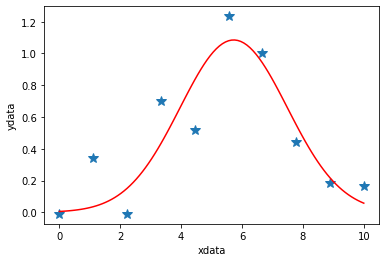

In [1]:
import numpy as np
import matplotlib . pyplot as plt
import math
from scipy.optimize import curve_fit
from scipy.optimize import fsolve

### Assignment 8(a)

# Creating a function to model and create data
def func(x, a, b, c):
    return a*np.exp(-(x-b)**2/(2*c**2))

# Generating clean data
x = np.linspace(0, 10, 10)
y = np.array([-0.00983774,0.34473621,-0.00974954,0.69951548,0.5170367,1.23443728,1.0023327,0.44091547,0.1839785,0.16744486])
popt, pcov = curve_fit(func, x, y)

#popt returns the best fit values for parameters of the given model (func).
# print(popt)

residuals = y - func(x,popt[0],popt[1],popt[2])
res = sum(residuals**2)
# print(res)

curvex=np.linspace(0,10,100)
curvey=func(curvex,popt[0],popt[1],popt[2])
plt.plot(x,y,'*',markersize=10)
plt.plot(curvex,curvey,'r')
plt.xlabel('xdata')
plt.ylabel('ydata')
plt.show()

[-10.]


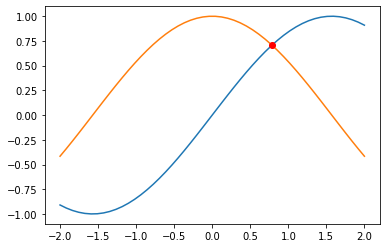

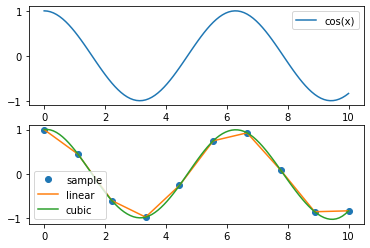

In [2]:
from scipy.optimize import fsolve

line = lambda x:x+10

solution = fsolve(line,-1)
print(solution)


# intersection of two functions

def findIntersection(fun1,fun2,x0):
    return fsolve(lambda x : fun1(x) - fun2(x),x0)

result = findIntersection(np.sin,np.cos,0.0)
x = np.linspace(-2,2,50)
plt.plot(x,np.sin(x),x,np.cos(x),result,np.sin(result),'ro')
plt.show()


# interpolation
import scipy.interpolate as sp

# 100 real points of cos(x) in [0 10]
xx = np.linspace(0, 10, 100)
yy = np.cos(xx)

# # 10 sample of cos(x) in [0 10]
x = np.linspace(0, 10, 10)
y = np.cos(x)

# # interpolation
fl = sp.interp1d(x, y,kind='linear')
fc = sp.interp1d(x, y,kind='cubic')

xnew = np.linspace(0, 10, 100)
plt.subplot(211)
# # the real cos(x) function plot
plt.plot(xx, yy)
plt.legend(['cos(x)'], loc='best')
plt.subplot(212)
# # the interpolation
plt.plot(x, y, 'o', xnew, fl(xnew), xnew, fc(xnew))
plt.legend(['sample', 'linear', 'cubic'], loc='lower left')
plt.show()

In [3]:
from scipy.integrate import quad,trapz

x = np.sort(np.random.randn(150)*4+ 4).clip(0,5)
func = lambda x: np.sin(x) * np.cos(x ** 2) + 1
y = func(x)
# # Integrating function with upper and lower limits of 0 and 5, respectively
fsolution = quad(func, 0, 5)
dsolution = trapz(y, x=x)
print('fsolution='+ str(fsolution[0]))
print('dsolution='+ str(dsolution))
print('The difference is ' + str(np.abs(fsolution[0] - dsolution)))

fsolution=5.100345067540932
dsolution=5.065535681984685
The difference is 0.034809385556246575


-1.0
2.0
-13.0


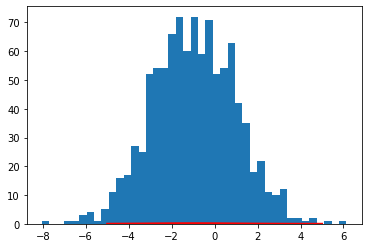

In [4]:
from scipy.stats import norm 
x = np.linspace(-5, 5, 100)
print(norm.mean(loc = -1, scale = 2))
print(norm.std(loc = -1, scale = 2))
print(norm.moment(3, loc = -1, scale = 2))

samples = norm.rvs(size = 1000, loc = -1, scale = 2)
h = plt.hist(samples, bins = 41)
plt.plot(x,norm.pdf(x,loc = -1,scale = 2),'r',linewidth=2)
plt.savefig('image5.png')
plt.show()

[[0.44632041 0.29611892]
 [0.62786501 0.9403667 ]
 [1.19865235 1.01985243]]


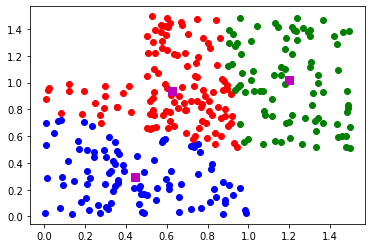

In [5]:
from scipy.cluster.vq import kmeans,vq

# data generation
data = np.vstack((np.random.rand(150,2) + np.array([.5,.5]),np.random.rand(150,2)))

# k-means with 3 clusters

centroids,_ = kmeans(data,3)
print(centroids)
idx,_ = vq(data,centroids)
plt.plot(data[idx==0,0],data[idx==0,1],'ob',
     data[idx==1,0],data[idx==1,1],'or',
     data[idx==2,0],data[idx==2,1],'og') # third cluster points
plt.plot(centroids[:,0],centroids[:,1],'sm',markersize=8)
plt.savefig('image6.png')
plt.show()

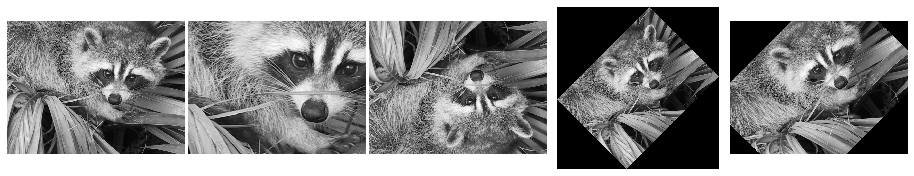

In [6]:
import scipy.misc
from scipy import ndimage

face = scipy.misc.face(gray=True)
lx, ly = face.shape
## Cropping
crop_face = face[lx//4:-lx//4, ly//4:-ly//4]

## up <-> down flip
flip_ud_face = np.flipud(face)

## rotation
rotate_face = ndimage.rotate(face, 45)
rotate_face_noreshape = ndimage.rotate(face, 45, reshape=False)

plt.figure(figsize=(12.5, 2.5))
plt.subplot(151)
plt.imshow(face, cmap=plt.cm.gray)
plt.axis('off')
plt.subplot(152)
plt.imshow(crop_face, cmap=plt.cm.gray)
plt.axis('off')
plt.subplot(153)
plt.imshow(flip_ud_face, cmap=plt.cm.gray)
plt.axis('off')
plt.subplot(154)
plt.imshow(rotate_face, cmap=plt.cm.gray)
plt.axis('off')
plt.subplot(155)
plt.imshow(rotate_face_noreshape, cmap=plt.cm.gray)
plt.axis('off')

plt.subplots_adjust(wspace=0.02, hspace=0.3, top=1, bottom=0.1, left=0,
                     right=1)

plt.show()